## Classification & Regression

### Some Sample Datasets

In [2]:
#Import libraries
#import mglearn 
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import scipy as sp

/home/irvingariel/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X.shape: (26, 2)


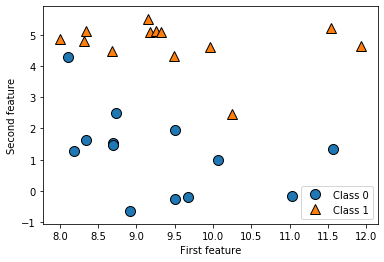

In [2]:
#Generate dataset
X,y = mglearn.datasets.make_forge()
#plot dataset
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(['Class 0','Class 1'],loc=4)
plt.xlabel('First feature')
plt.ylabel('Second feature')
print('X.shape: {}'.format(X.shape))

Text(0, 0.5, 'Target')

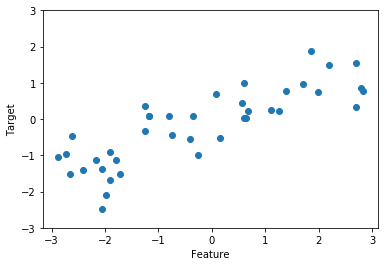

In [3]:

X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel('Target')

### Cancer dataset

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('Cancer.keys(): \n{}'.format(cancer.keys()))

Cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
print('Shape of cancer data: {}'.format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [6]:
print('Sample counts per class:\n{}'.format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [7]:
print('Feature names: \n {}'.format(cancer.feature_names))

Feature names: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print('Date shape: {}'.format(boston.data.shape))

Date shape: (506, 13)


In [9]:
X,y = mglearn.datasets.load_extended_boston()

print('X.shae : {}'.format(X.shape))

X.shae : (506, 104)


## K-Nearest Neighbors

/home/irvingariel/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


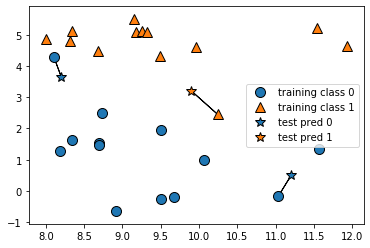

In [10]:
#Plot KNN with one neighbor
mglearn.plots.plot_knn_classification(n_neighbors=1)

/home/irvingariel/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


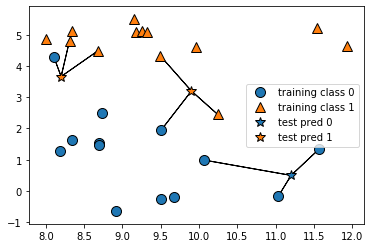

In [11]:
#Plot KNN three neighbors
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [12]:
#Building example
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

/home/irvingariel/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [13]:
#Use KNN from Sklearn
from sklearn.neighbors import KNeighborsClassifier
clf  = KNeighborsClassifier(n_neighbors=3)

In [14]:
#Training Data
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [15]:
#Use predict in test set
print('Test set predictions: {}'.format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [16]:
#Test set accuracy
print('Test set accuracy: {:.2f}'.format(clf.score(X_test,y_test)))

Test set accuracy: 0.86


## Analyzing KNeighborsClassifier

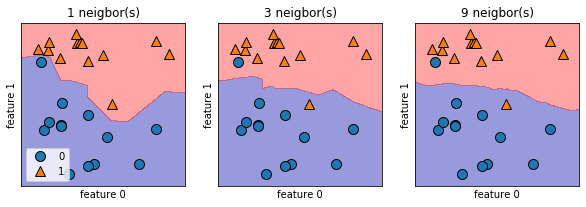

In [17]:
#Decision Boundary
fig, axes = plt.subplots(1,3,figsize=(10,3))

for n_neighbors, ax in zip([1,3,9],axes):
    #the fit method returns the object self, so we can instantiate
    #and fit in one line
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title('{} neigbor(s)'.format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel('feature 1')
axes[0].legend(loc=3)

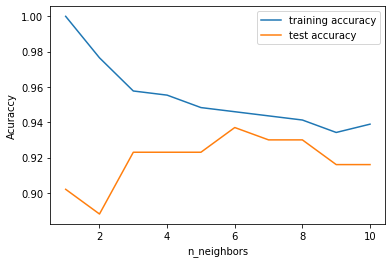

In [18]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split( cancer.data, cancer.target, stratify = cancer.target, random_state = 66)
training_accuracy = []
test_accuracy = []
#try n_neighbors from 1 to 10
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    #build the model
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train,y_train)
    #record training set accuracy
    training_accuracy.append(clf.score(X_train,y_train))
    #record generalization accuracy
    test_accuracy.append(clf.score(X_test,y_test))
    
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Acuraccy")
plt.xlabel("n_neighbors")
plt.legend()

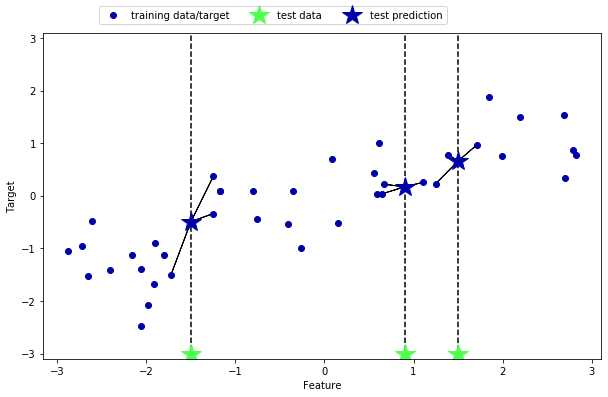

In [19]:
#Use Knn Regression with three neighbors
mglearn.plots.plot_knn_regression(n_neighbors=3)

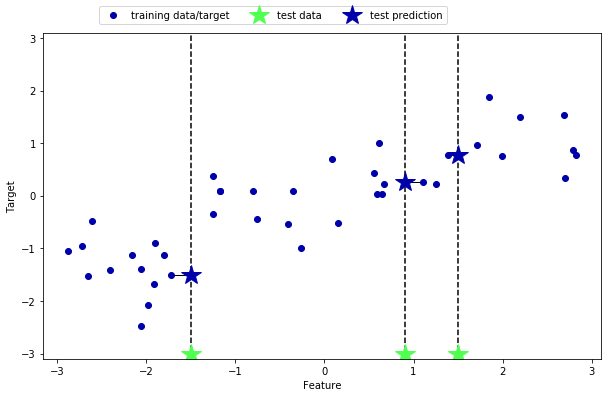

In [20]:
#Use KNN regression with one neighbor
mglearn.plots.plot_knn_regression(n_neighbors=1)

In [21]:
from sklearn.neighbors import KNeighborsRegressor
X,y = mglearn.datasets.make_wave(n_samples = 40)
#split the wave dataset into training anda a test set
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

#instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)

#fit the model using the training data and training targets
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [22]:
print('Test set predictions: \n {}'.format(reg.predict(X_test)))

Test set predictions: 
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [23]:
print('Test set R2: {:.2}'.format(reg.score(X_test,y_test)))

Test set R2: 0.83


### Analyzing KNeighborsRegressor

AttributeError: 'Line2D' object has no property 'makersize'

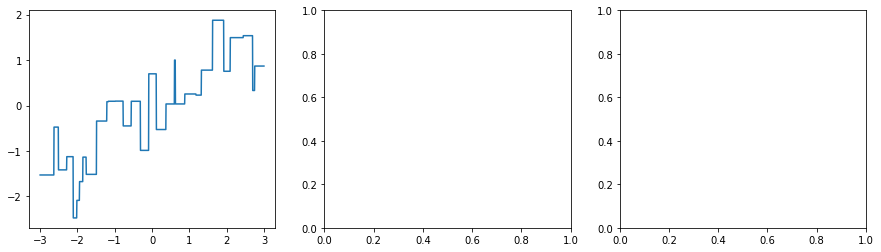

In [24]:
fig, axes  = plt.subplots(1,3,figsize=(15,4))
#create 1000 data points, evenly spaced between -3 and 3
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9],axes):
    #make predictions usind 1,3,9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train,'^',c = mglearn.cm2(0),makersize = 8)
    ax.plot(X_test, y_test,'v', c = mglearn.cm2(1),markersize = 8)
    
    ax.set_title('{} neighbor(s)\n train score: {:.2f} test score : {:.2f}'.format(n_neighbors, reg.score(X_train,y_train),reg.score(X_test,y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(['Model predictions','Training data / target','Test data/ target'],loc='best')

# Linear Models

## Linear Models for Regression

w[0]: 0.393906  b: -0.031804


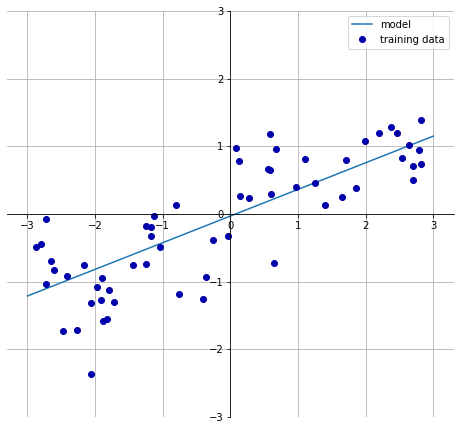

In [25]:
import mglearn
mglearn.plots.plot_linear_regression_wave()

# Linear regression (aka ordinary least squares)

In [26]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
X,y =mglearn.datasets.make_wave(n_samples=60)
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
lr = LinearRegression().fit(X_train,y_train)

print('lf.coef_: {}'.format(lr.coef_))
print('lr.intercept_:{}'.format(lr.intercept_))

lf.coef_: [0.39390555]
lr.intercept_:-0.031804343026759746


In [27]:
print('Training set score: {:.2f}'.format(lr.score(X_train,y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [28]:
X,y = mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)

In [29]:
print('Training set score: {:.2f}'.format(lr.score(X_train,y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test,y_test)))

Training set score: 0.95
Test set score: 0.61


## RIDGE REGRESSION

In [30]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train,y_train)
print('Training set score: {:.3f}'.format(ridge.score(X_train,y_train)))
print('Test set score: {:.2f}'.format(ridge.score(X_test,y_test)))

Training set score: 0.886
Test set score: 0.75


In [31]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train,y_train)))
print('Test set score: {:.2f}'.format(ridge10.score(X_test,y_test)))

Training set score: 0.79
Test set score: 0.64


In [32]:
ridge01 = Ridge(alpha=.1).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train,y_train)))
print('Test set score: {:.2f}'.format(ridge01.score(X_test,y_test)))

Training set score: 0.93
Test set score: 0.77


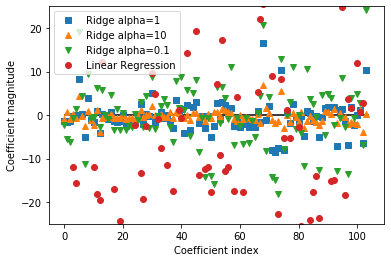

In [33]:
plt.plot(ridge.coef_,'s',label = "Ridge alpha=1")
plt.plot(ridge10.coef_,'^',label = "Ridge alpha=10")
plt.plot(ridge01.coef_,'v',label = 'Ridge alpha=0.1')

plt.plot(lr.coef_,'o',label='Linear Regression')
plt.xlabel("Coefficient index")
plt.ylabel('Coefficient magnitude')
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

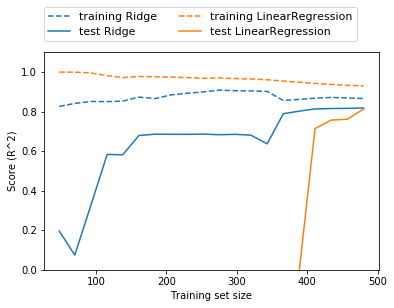

In [34]:
mglearn.plots.plot_ridge_n_samples()

## LASSO

In [35]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train,y_train)
print('Training set score: {:.2f}'.format(lasso.score(X_train,y_train)))
print('Test set score: {:.2f}'.format(lasso.score(X_test,y_test)))
print('Number of features used : {}'.format(np.sum(lasso.coef_!=0)))

Training set score: 0.29
Test set score: 0.21
Number of features used : 4


In [36]:
#We increase the default setting of "max_iter",
#otherwise the model would warn us that we should increase mas_iter

lasso001 = Lasso(alpha=0.01,max_iter=1000000).fit(X_train,y_train)
print('Training set score: {:.2f}'.format(lasso001.score(X_train,y_train)))
print('Test set score: {:.2f}'.format(lasso001.score(X_test,y_test)))
print('Number of features used: {}'.format(np.sum(lasso001.coef_!=0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [37]:

lasso00001 = Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)
print('Training set score: {:.2f}'.format(lasso00001.score(X_train,y_train)))
print('Test set score: {:.2f}'.format(lasso00001.score(X_test,y_test)))
print('Number of features used: {}'.format(np.sum(lasso00001.coef_!=0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


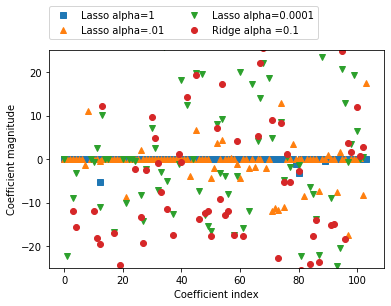

In [38]:
plt.plot(lasso.coef_,'s',label = "Lasso alpha=1")
plt.plot(lasso001.coef_,'^',label = "Lasso alpha=.01")
plt.plot(lasso00001.coef_,'v',label = 'Lasso alpha=0.0001')

plt.plot(lr.coef_,'o',label='Ridge alpha =0.1')
plt.xlabel("Coefficient index")
plt.ylabel('Coefficient magnitude')
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend(ncol=2,loc=(0,1.05))

# LINEAR MODELS FOR CLASSIFICATION

### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

/home/irvingariel/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/home/irvingariel/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/irvingariel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


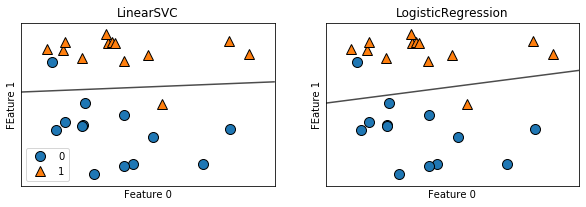

In [40]:

X,y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2, figsize = (10,3))
for model, ax in zip([LinearSVC(),LogisticRegression()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,ax=ax,alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("FEature 1")
axes[0].legend()

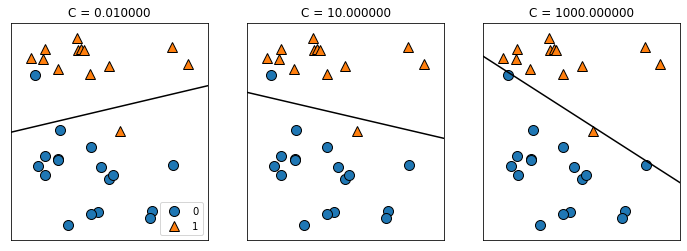

In [41]:
mglearn.plots.plot_linear_svc_regularization()

Analyze LogisticRegression in more detail on the Breast Cancer dataset:

In [42]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
logreg = LogisticRegression().fit(X_train,y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train,y_train)))
print('Test set score: {:.3f}'.format(logreg.score(X_test,y_test)))

Training set score: 0.953
Test set score: 0.958


/home/irvingariel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [43]:
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
print('Training set score: {:.3f}'.format(logreg100.score(X_train,y_train)))
print('Test set score: {:.3f}'.format(logreg100.score(X_test,y_test)))

Training set score: 0.972
Test set score: 0.965


/home/irvingariel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [44]:
logreg001 = LogisticRegression(C=0.01).fit(X_train,y_train)
print('Training set score: {:.3f}'.format(logreg001.score(X_train,y_train)))
print('Test set score: {:.3f}'.format(logreg001.score(X_test,y_test)))

Training set score: 0.934
Test set score: 0.930


/home/irvingariel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
